# Explore here

In [29]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from dotenv import load_dotenv
import seaborn as sns
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import os
os.remove(".cache")

# load the .env file variables
load_dotenv()

True

In [30]:
# Spotify API credentials
client_id = os.environ.get("CLIENT_ID")
client_secret = os.environ.get("CLIENT_SECRET")
auth_manager = SpotifyClientCredentials(client_id=client_id, client_secret=client_secret)
spotify = spotipy.Spotify(auth_manager=auth_manager)

In [31]:
#5 ID del artista 
harrystyles_id = "6KImCVD70vtIoJWnq6nGn3"

# Obtener los temas más populares del artista
results = spotify.artist_top_tracks(harrystyles_id)

# Extraer nombre, popularidad y duracción

track_info = [
    {
        "nombre": track["name"],
        "popularidad": track["popularity"],
        "duración_minutos": round(track["duration_ms"]/6000, 2), # para convertir los milisegundos en minutos y limitar a dos decimales.
    }
    for track in results["tracks"]
]

# Mostrar resultados
for track in track_info:
    print(track)

{'nombre': 'As It Was', 'popularidad': 90, 'duración_minutos': 27.88}
{'nombre': 'Sign of the Times', 'popularidad': 87, 'duración_minutos': 56.78}
{'nombre': 'Watermelon Sugar', 'popularidad': 86, 'duración_minutos': 29.0}
{'nombre': 'Adore You', 'popularidad': 83, 'duración_minutos': 34.52}
{'nombre': 'Falling', 'popularidad': 83, 'duración_minutos': 40.02}
{'nombre': 'Matilda', 'popularidad': 81, 'duración_minutos': 40.99}
{'nombre': 'Fine Line', 'popularidad': 81, 'duración_minutos': 62.99}
{'nombre': 'Late Night Talking', 'popularidad': 80, 'duración_minutos': 29.66}
{'nombre': 'Golden', 'popularidad': 78, 'duración_minutos': 34.82}
{'nombre': 'Satellite', 'popularidad': 77, 'duración_minutos': 36.43}


In [32]:
# 6 Transformar a Pandas DataFrame
df_tracks = pd.DataFrame(track_info)

# Ordenar las canciones por popularidad
df_ordenado = df_tracks.sort_values(by="popularidad", ascending=True)

# Mostrar top 3
print(df_ordenado.head(3))

               nombre  popularidad  duración_minutos
9           Satellite           77             36.43
8              Golden           78             34.82
7  Late Night Talking           80             29.66


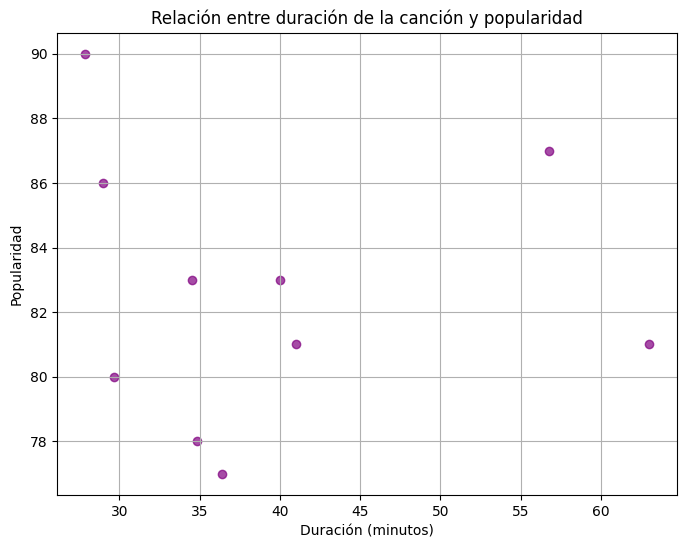

In [33]:
# 7 Analizar relación estadística

# Crear el scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(df_tracks["duración_minutos"], df_tracks["popularidad"], color="purple", alpha=0.7)
plt.title("Relación entre duración de la canción y popularidad")
plt.xlabel("Duración (minutos)")
plt.ylabel("Popularidad")
plt.grid(True)
plt.show()

**Conclusión**

A partir del gráfico, no se observa una relación clara entre la popularidad y la duración de las canciones. Por lo tanto, no se puede afirmar que las canciones más cortas sean necesariamente más populares.

## 